## Приближение функций

- [Интерполяционный полином Лагранжа](#интерполяционный-полином-лагранжа)
- [Оценка ошибки приближения](#оценка-ошибки)
- [Феномен Рунге](#феномен-рунге)
- [Функция Хевисайда](#функция-хевисайда)

### Интерполяционный полином Лагранжа

Рассмотрим объекты:

$\omega(x) = (x-x_0)(x-x_1) \dotsc (x-x_n), \qquad x \in [x_0, x_n]$

$\omega _k(x) = \frac{\omega(x)}{x - x_k} = (x-x_0) \dotsc (x-x_{k-1})(x-x_{k+1}) \dotsc (x-x_n)$

Заметим, что $\omega _k(x)$ обращается в 0 для $x \neq x_k$, а для $x_k$ это какое-то число

$L_k = \frac{\omega _k(x)}{\omega _k(x_k)}$ - множитель Лагранжа

$f(x_k) \cdot L_k = f(x_k) \cdot \frac{\omega _k(x)}{\omega _k(x_k)} = \begin{cases} 
    0, & x \neq x_k \\
    f(x_k), & x = x_k 
\end{cases}$ 

_Интерполяционный полином для функции_ $f$ _со старшей степенью_ $m$:

$$Q_m(x) = \sum\limits_{i=0}^n f(x_i) \cdot \frac{w_i(x)}{w_i(x_i)} = \sum\limits_{i=0}^n f(x_i) \cdot L_i$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd
import math

Рассматриваем функцию, заданную аналитически:

$$f(x) = sinx \cdot cosx \cdot x^2, \quad  x \in [a,b]$$

In [ ]:
def f(x):
    return np.sin(x)*np.cos(x)*x**2

a, b = -1, 2
m = 7

xx = np.linspace(a, b, m + 1)  # узлы
yy = f(xx) # функция f в узлах

print(xx)

[-1.         -0.57142857 -0.14285714  0.28571429  0.71428571  1.14285714
  1.57142857  2.        ]


Хотим интерполировать объект $f(x)$ алгебраическим полиномом $Q$ страшей степени $m$:

- Возьмем $t$ в качестве свободного аргумента (какое-то значение $x \in [x_0, x_n]$)
- Последовательно построим $Q$

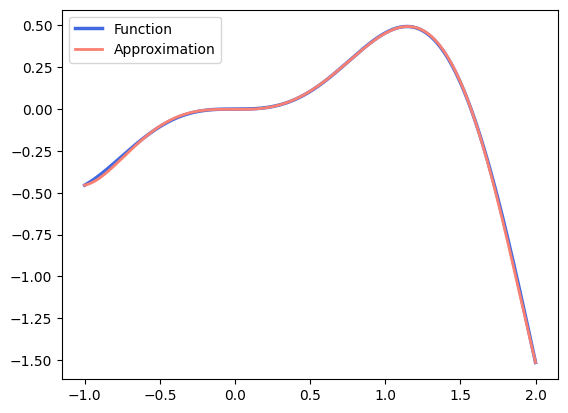

In [48]:
def Q(x,y,t):
    n = len(x)
    Q_n = 0
    omega = 1
    for i in range(n): # цикл по узлам
        L = 1
        for j in range(n):
            if j != i:
                L *= (t - x[j])/(x[i] - x[j]) # множитель Лагранжа
        Q_n += L*y[i]
        omega *= (t - x[i])
    return Q_n, omega

t = np.linspace(a, b, 1000)
Q_m, omega = Q(xx,yy,t)
plt.plot(t, f(t), color = 'royalblue', label = 'Function', linewidth=2.5)
plt.plot(t, Q_m, color = 'salmon', label = 'Approximation', linewidth=2)
plt.legend()
plt.show()

### Оценка ошибки

_Теорема (об остаточном члене интерполяции)_: $R_m(x) = f(x) - Q_m(x)$

$$R_m(x) = \frac{f^{(m+1)}(\eta)}{(m+1)!} \cdot \omega(x), \quad \eta = \eta(x) \in (x_0, x_1)$$

_Оценка сверху:_

$|R_m(x)| \leqslant \frac{M_{m+1}}{(m+1)!} \cdot |\omega(x)|, \quad M_{m+1} = \mathop{\text{max}}\limits_{x \in [x_0, x_n]} \Big| f^{(m+1)}(x) \Big|$

M = 2354.642536473284


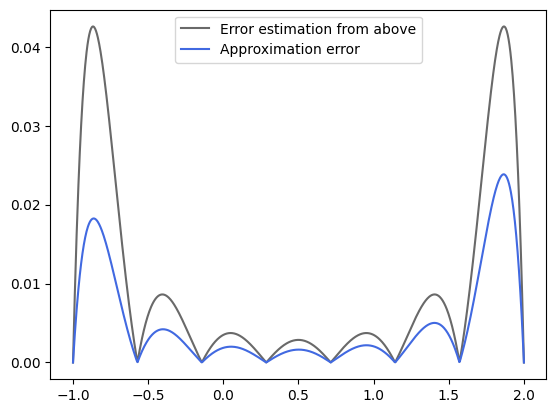

In [49]:
dfdx_m = nd.Derivative(f, n = m + 1)(t) # (m+1)-ая производная функции f

M = dfdx_m[np.argmax(np.abs(dfdx_m))]  # максимальное значение по модулю
print("M =", M)

err_upper = M/math.factorial(m+1)*np.abs(omega) # оценка R_m (оценка ошибки сверху)
err_fact = np.abs(f(t) - Q_m) # фактическая ошибка

plt.plot(t, err_upper, color = 'dimgrey', label = 'Error estimation from above') 
plt.plot(t, err_fact, color = 'royalblue', label = 'Approximation error')
plt.legend()
plt.show()

### Феномен Рунге

$$f(x) = \frac{1}{1 + 25x^2}$$

"Переобучить" можно даже полином Лагранжа

- Например, взять функцию Рунге и посмотреть, как меняется верхняя оценка ошибки при разных $m$
    - производная растет слишком быстро и факториал с ней не справляется
- Но с этим можно как-то разобраться (потом)

3.247256769655028
49.99999999996538
583.4163760113845
14999.9999384167
313877.0603271272
11249965.544781808
342893840.04827344
15746584892.606253
631452340374.9463
35404648749469.64


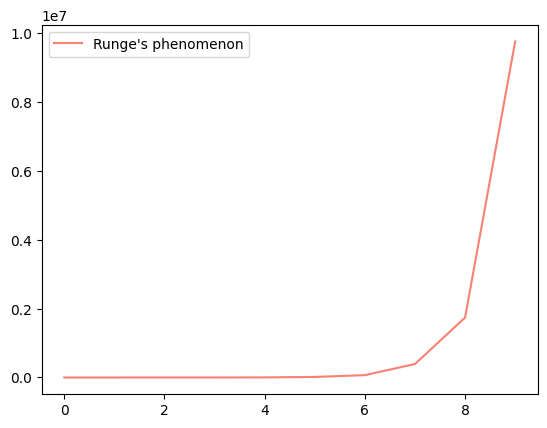

In [50]:
def Runge(x):
    return 1/(1 + 25*x**2)

lst = []
for k in range(10):
    dfdx = np.abs(nd.Derivative(Runge, n = k+1)(t))
    M_ = dfdx[np.argmax(dfdx)]
    print(M_)
    lst.append(M_/math.factorial(k+1))

plt.plot(lst, color='salmon', label='Runge\'s phenomenon')
plt.legend()
plt.show()

### Функция Хевисайда

$$\theta(x) = \begin{cases} 
    0, & x < 0 \\
    1, & x \geqslant 0
\end{cases}$$ 


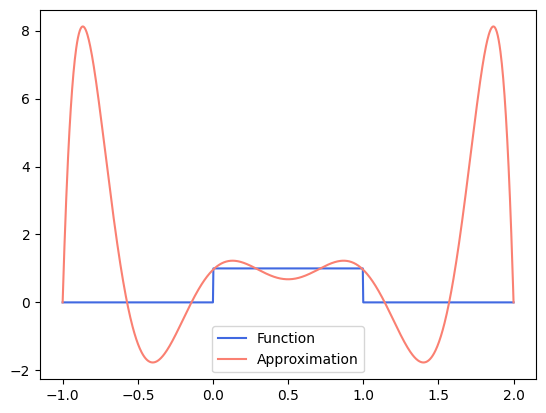

In [51]:
def h(x):
    return np.heaviside(x-0, 0) * np.heaviside(1-x, 0)

# добавили 0.01 и 0.99
x_ = np.array([-1, -0.57142857, -0.14285714, 0.01, 0.28571429, 0.71428571, 0.99, 1.14285714, 1.57142857, 2])
m_ = len(x_) - 1

y_ = h(x_) 
Q_m_, omega = Q(x_,y_,t)
plt.plot(t, h(t), color = 'royalblue', label = 'Function')
plt.plot(t, Q_m_, color = 'salmon', label = 'Approximation')
plt.legend()
plt.show()